# Data Analysis for Voting

Import modules

In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

Import all the results from the voting ABM and add a column with the sim number

In [20]:
base_dir = "C:/Users/hugov/Github/Bachelor-project/Data/Voting_results"

# Define the ranges for the file names
range_1 = range(1, 26)
range_2 = [500]

# Dictionary to store the data frames
voting_results = {}

# Loop over the ranges and read the files dynamically
for i in range_1:
    for j in range_2:
        # Construct the file name
        file_name = f"voting_results{i}_{j}.csv"
        file_path = os.path.join(base_dir, file_name)
        
        # Read the CSV file and store it in the dictionary
        if os.path.exists(file_path):
            data_name = f"voting_results{i}_{j}"
            df = pd.read_csv(file_path)
            df["sim"] = i  # Add `i` as a column
            voting_results[data_name] = df
        else:
            print(f"File not found: {file_path}")

# Combine all DataFrames into one
combined_voting_results = pd.concat(voting_results.values(), ignore_index=True)

View example df

In [21]:
pd.set_option('display.max_columns', None)  # Show all columns
print(voting_results.get("voting_results1_500").head(50))


    who       color  heading       xcor       ycor     shape label  \
0     0  100.457427       30  49.875958 -27.332296  "person"    ""   
1     0  100.457427       30  49.875958 -27.332296  "person"    ""   
2     0  100.457427       30  49.875958 -27.332296  "person"    ""   
3     0  100.457427       30  49.875958 -27.332296  "person"    ""   
4     0  100.457427       30  49.875958 -27.332296  "person"    ""   
5     0  100.457427       30  49.875958 -27.332296  "person"    ""   
6     0  100.457427       30  49.875958 -27.332296  "person"    ""   
7     0  100.457427       30  49.875958 -27.332296  "person"    ""   
8     0  100.457427       30  49.875958 -27.332296  "person"    ""   
9     0  100.457427       30  49.875958 -27.332296  "person"    ""   
10    1  100.000000      111 -30.630094 -10.927240  "person"    ""   
11    1  100.000000      111 -30.630094 -10.927240  "person"    ""   
12    1  100.000000      111 -30.630094 -10.927240  "person"    ""   
13    1  100.000000 

Plot vote outcome per sim

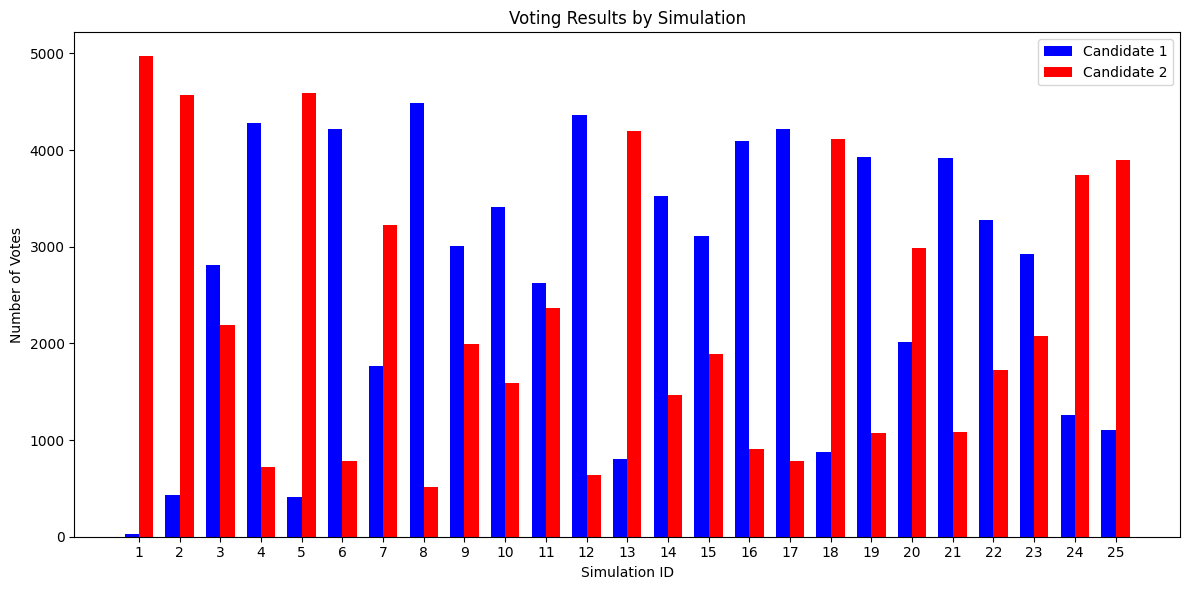

In [22]:

# Step 1: Aggregate results
vote_counts = combined_voting_results.groupby(['sim', 'Vote']).size().unstack(fill_value=0)

# Ensure all simulations and candidates are represented
vote_counts = vote_counts.reindex(index=range(1, 26), columns=['Candidate_0', 'Candidate_1'], fill_value=0)

# Step 2: Prepare data for plotting
simulations = vote_counts.index
candidate_1_votes = vote_counts['Candidate_0']
candidate_2_votes = vote_counts['Candidate_1']

# Step 3: Plot with Matplotlib
bar_width = 0.35
x_indices = np.arange(len(simulations))

plt.figure(figsize=(12, 6))

# Bars for Candidate 1
plt.bar(x_indices - bar_width/2, candidate_1_votes, width=bar_width, label='Candidate 1', color='blue')

# Bars for Candidate 2
plt.bar(x_indices + bar_width/2, candidate_2_votes, width=bar_width, label='Candidate 2', color='red')

# Customize plot
plt.xlabel('Simulation ID')
plt.ylabel('Number of Votes')
plt.title('Voting Results by Simulation')
plt.xticks(x_indices, simulations)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
